### Import Repo and Install packages:

In [40]:
!git clone https://github.com/jhell1717/latentoptim.git
!pip install git+https://github.com/jhell1717/latentoptim.git

Cloning into 'latentoptim'...
remote: Enumerating objects: 517, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 517 (delta 31), reused 57 (delta 23), pack-reused 397 (from 2)
Receiving objects: 100% (517/517), 181.44 MiB | 15.13 MiB/s, done.
Resolving deltas: 100% (159/159), done.
  Cloning https://github.com/jhell1717/latentoptim.git to /private/var/folders/g6/cp4y9yrj70746qd9t6j1yj2r0000gn/T/pip-req-build-5n2xxbvk
  Running command git clone --filter=blob:none --quiet https://github.com/jhell1717/latentoptim.git /private/var/folders/g6/cp4y9yrj70746qd9t6j1yj2r0000gn/T/pip-req-build-5n2xxbvk
  Resolved https://github.com/jhell1717/latentoptim.git to commit 6e47e2d609fa4322af9dcb19d935ff3f06b94642
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/mark-hobbs/pyga.git to /private/var/folders/g6/cp4y9yrj70746

### Imports
* Import standard packages

In [86]:
import os
import random
import pickle
import numpy as np
import matplotlib.pyplot as plt
import torch

# Our custom packages.
import pyga
import vae
import data
import utils

if torch.cuda.is_available():
  device = 'cuda'
else:
  device = 'cpu'

### Generate Random Shape Dataset:
* User specifies resolution
* User specifies number of shapes to generate.
* ```Generator``` class is used to create random shape objects.
* Generated shapes will be stored as a .pkl file here: ```/content/latentoptim/examples/vae_examples/colab/demo_shapes.pkl```

In [44]:
base_dir = r'/Users/joshuahellewell/Desktop/01-dev/latentoptim/examples/vae_examples/colab'
# Creates shape random shape data.
shape_data = data.Generator(resolution=200,num_shapes=10000).generate_shapes()

file_path = os.path.join(base_dir,'demo_shapes.pkl'),

# Save shape population as .pkl
with open(file_path[0], "wb") as f:
    pickle.dump(shape_data, f)

dataset = vae.ShapeData(shape_data) # Create dataset object

100%|██████████| 10000/10000 [00:00<00:00, 14500.95it/s]


### Visualise a random generated shape from the dataset:
* Random shapes are sampled from the generated population.
* All shapes are examples from the defined categories specified in the ```Generator``` class.

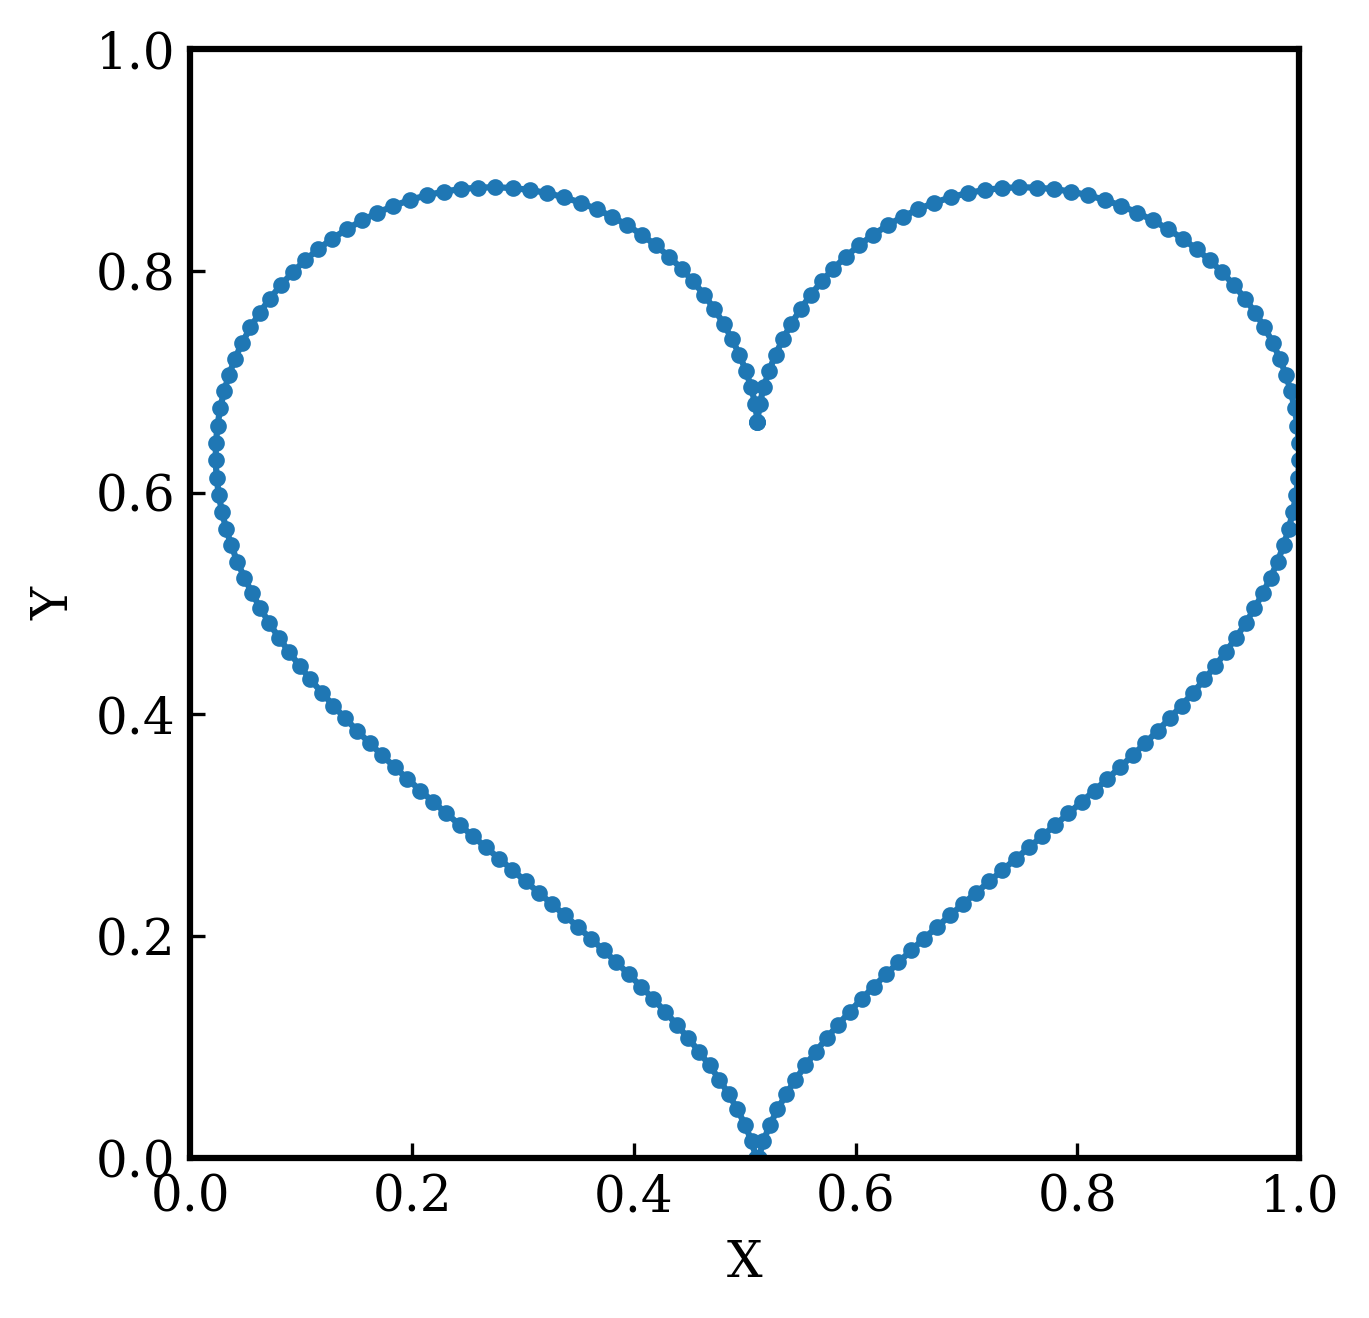

In [45]:
random_shape_id = np.random.choice(range(0,len(dataset.shapes))) # Select random test index.
dataset.shapes[random_shape_id].plot() # Visualise shape. 

### Build VAE Model:
* User specifies ```input_size```. e.g., 200 nodes x,y = 200*2
* User specifies dimension of latent space with ```latent_dim``` variable.
* ```VAE``` class is used to build the VAE architecture.

In [2]:
latent_dimensions = 3
number_nodes = 200 
model = vae.VAE(input_size=number_nodes*2,latent_dim=latent_dimensions) # Create model object
model.to(device) # Assign model to GPU if available.


NameError: name 'vae' is not defined

### Train VAE Model:
* Train the VAE model defined as ```model``` above.
* User specifies epochs, batch size and frequency of training checkpoints.
* Change the ```model_name``` variable to denote a new model.
* The model will be saved and the loss plot stored in ```/content/latentoptim/examples/vae_examples/colab/example_model```

In [ ]:
batch_size = 512
learning_rate = 1e-3

trainer = vae.Trainer(dataset, model, base_dir=base_dir,
                      trained_data=os.path.join(base_dir,'demo_shapes.pkl'), model_name='example_model2', batch_size=batch_size,lr=learning_rate)

# Train model
trainer.train_model(epochs=50,checkpoint_interval=20)

Epoch 1, Loss: 1634.3129272460938
Epoch 2, Loss: 842.8402099609375
Epoch 3, Loss: 622.931921005249
Epoch 4, Loss: 686.9713468551636
Epoch 5, Loss: 793.9466314315796
Epoch 6, Loss: 703.6630706787109
Epoch 7, Loss: 578.1239280700684
Epoch 8, Loss: 537.9515471458435
Epoch 9, Loss: 386.4476022720337
Epoch 10, Loss: 375.7093391418457
Epoch 11, Loss: 287.5373463630676
Epoch 12, Loss: 338.54790592193604
Epoch 13, Loss: 331.0690574645996
Epoch 14, Loss: 282.1911482810974
Epoch 15, Loss: 307.83401012420654
Epoch 16, Loss: 366.0960192680359
Epoch 17, Loss: 309.03984546661377
Epoch 18, Loss: 365.73762130737305
Epoch 19, Loss: 365.83354806900024
Epoch 20, Loss: 270.2895302772522
Epoch 21, Loss: 284.58836126327515
Epoch 22, Loss: 372.4570279121399
Epoch 23, Loss: 341.8926959037781
Epoch 24, Loss: 308.01200580596924
Epoch 25, Loss: 251.91797256469727
Epoch 26, Loss: 254.99476766586304
Epoch 27, Loss: 289.76836252212524
Epoch 28, Loss: 257.1541600227356
Epoch 29, Loss: 284.0978002548218
Epoch 30, Los

### Specify Model Details
* In this example, we test only 1 model. 
* For additional models, we can add additional models into the array ```models``` and specify their corresponding latent dimensions in ```latent_dims```

In [48]:
models = [model.to('cpu')] # List of trained models to sample and generate designs.
latent_dims = [latent_dimensions] # List of dimensions associated with each latent model.

### Sample Trained VAE Model:
* For each combination of the latent variables (if > 1), we generate the latent space for shapes samples between latent values $[-3,+3]$
* Each 2D visualisation of latent dimension pairings are stored here: ```/content/latent_space_plots```
* We fix all but the visualised latent dimensions to values of $0.0$

In [49]:
utils.plot_all_latent_combinations(models,latent_dims,vae_metrics=vae.Metrics,shapes_path=os.path.join(base_dir,'demo_shapes.pkl'))


 Plotting for latent dimension: 3D
  ➤ Generating KDE plot...
  ➤ Saving: varying_z1_z2_fixed_z3=1.0.png
  ➤ Saving: varying_z1_z3_fixed_z2=1.0.png
  ➤ Saving: varying_z2_z3_fixed_z1=1.0.png


### Genetic Algorithm Optimisation:

In [65]:
utils.ShapeVAE.set_model(model) # Set trained model to model in GPR workflow.

### Using Original Training Data

In [61]:
random_indexes = random.sample(range(len(dataset.shapes)), 200)
random_subset = [utils.ShapeVAE(dataset.shapes[i].points.flatten(),model) for i in random_indexes]
sh = [torch.tensor(shape.genes, dtype = torch.float32).view(-1) for shape in random_subset]


In [4]:
population_size = 20 # GA initial population size. 

individuals = [utils.ShapeVAE(np.random.uniform(-3, 3, size=3)) for _ in range(population_size)] # Sample from random distribution.

population = pyga.Population(individuals) # Create population with generated individuals.

NameError: name 'utils' is not defined

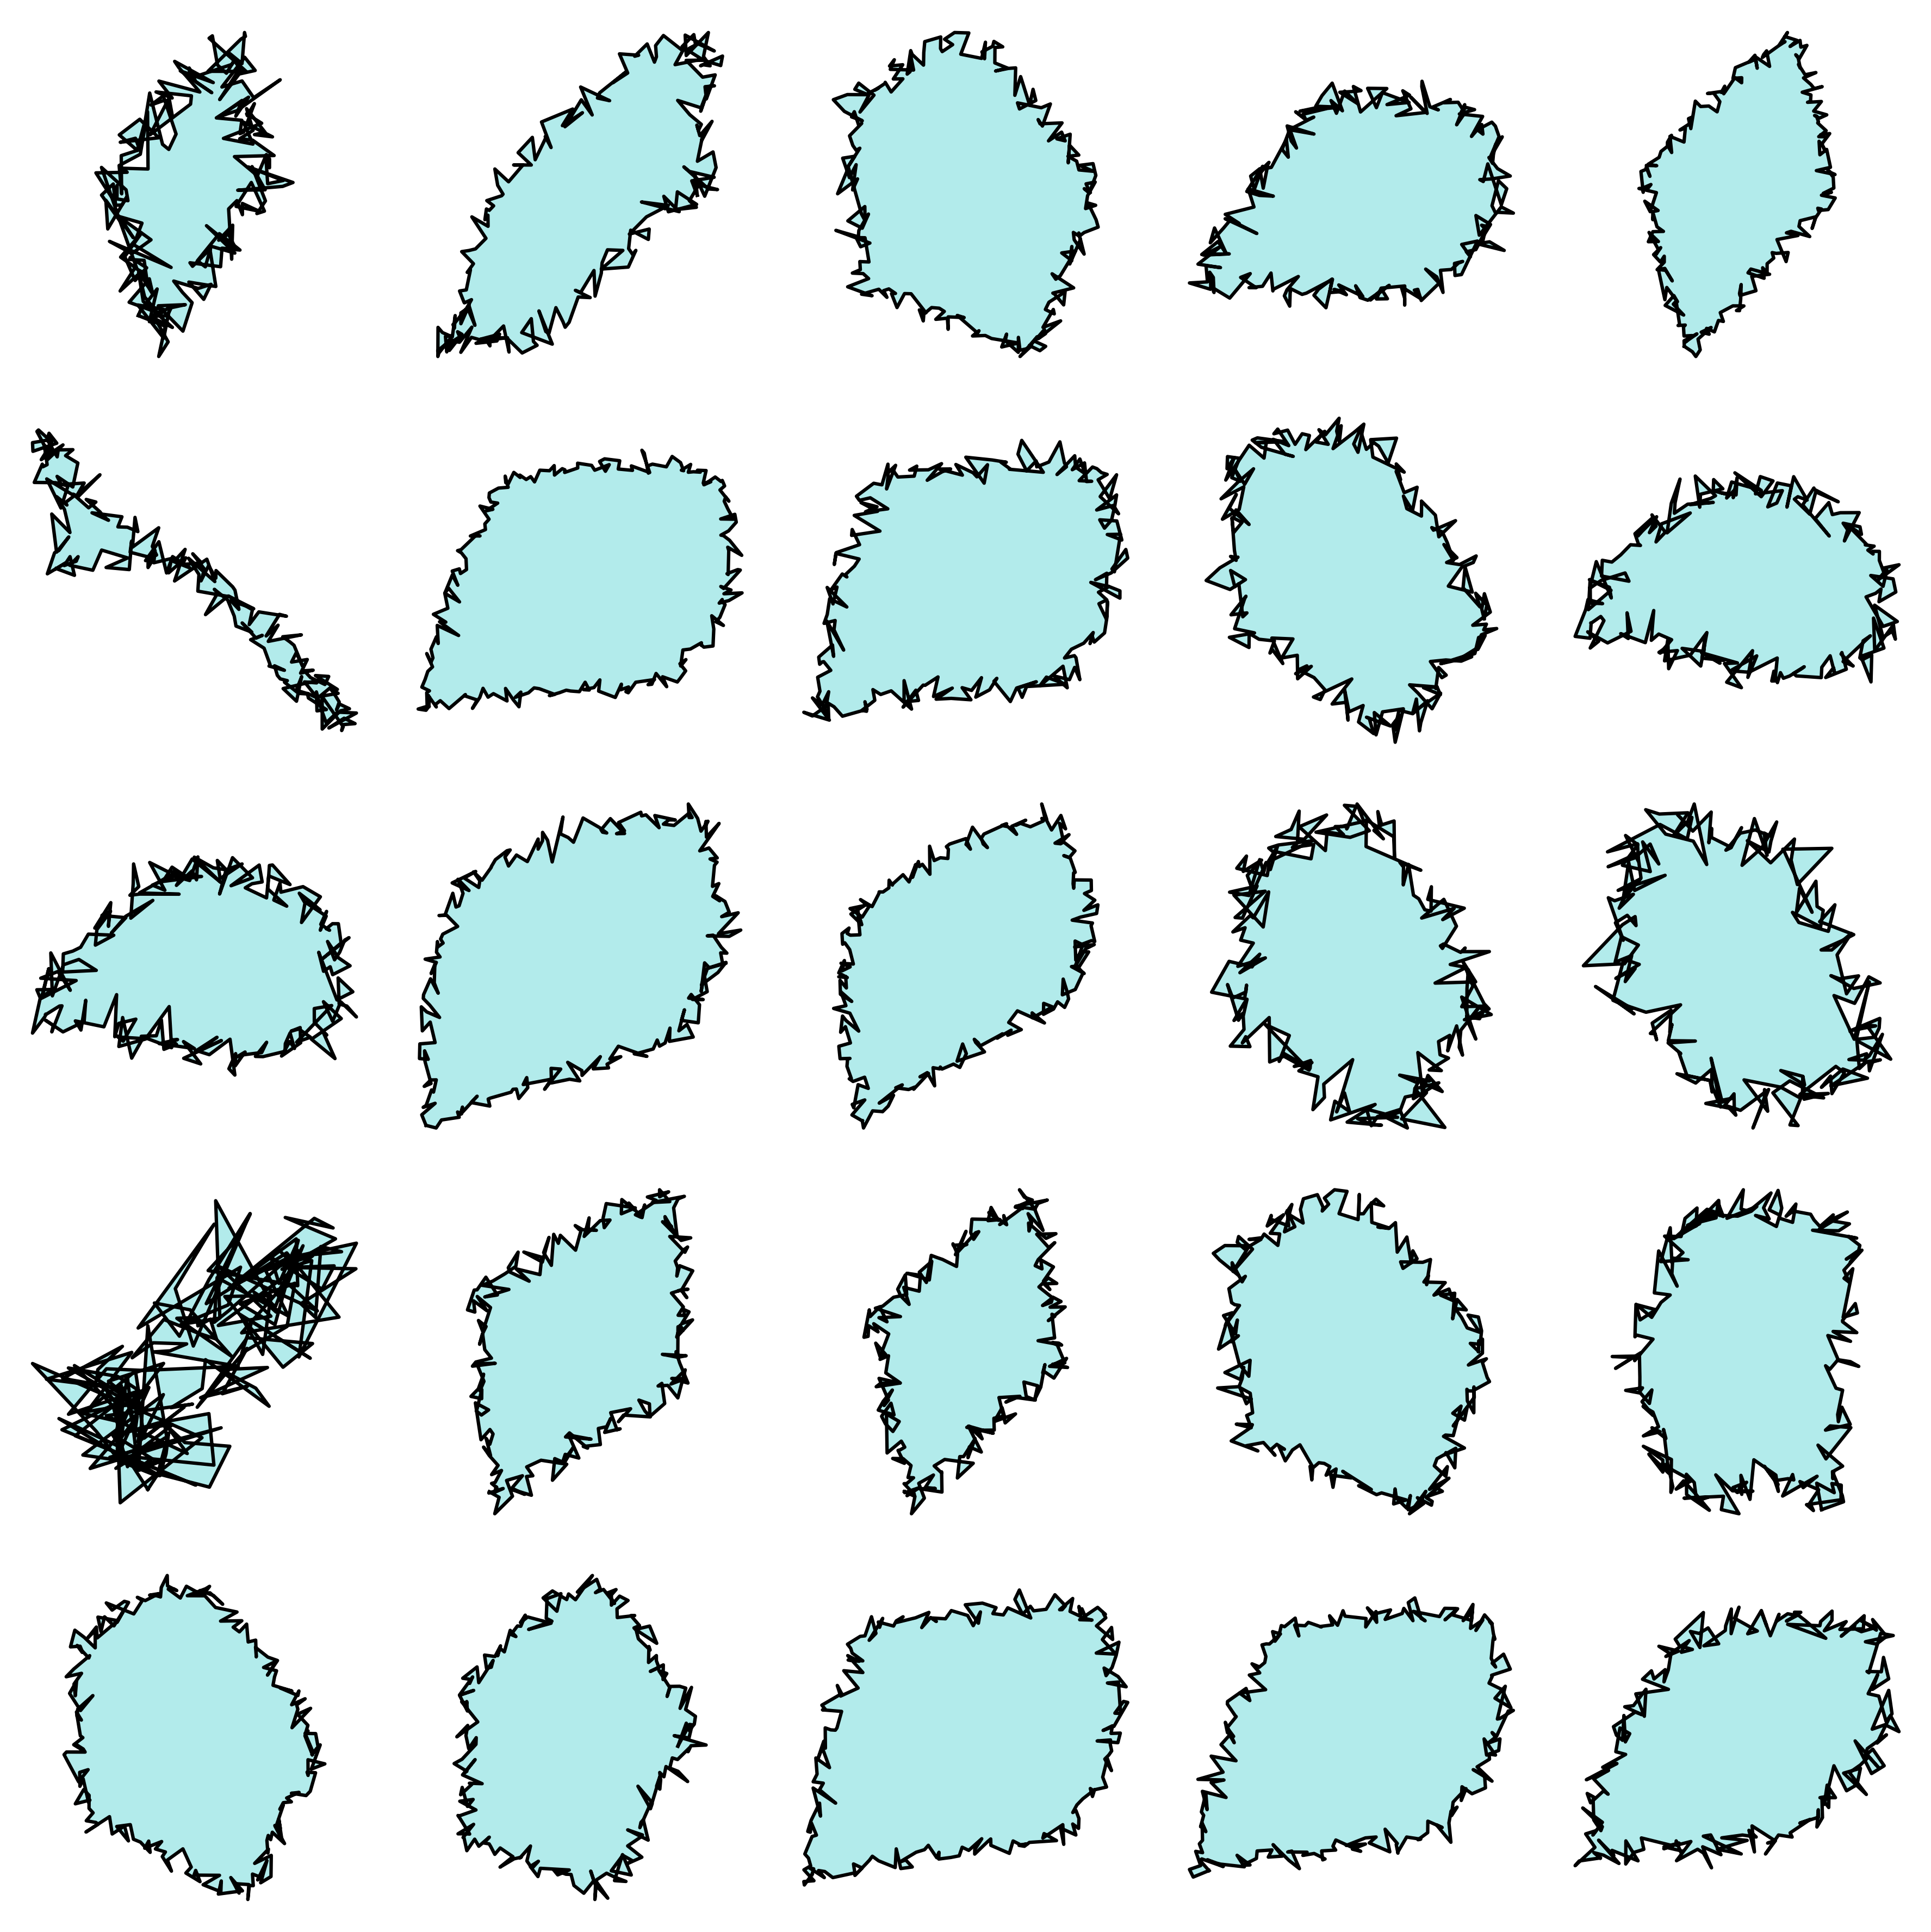

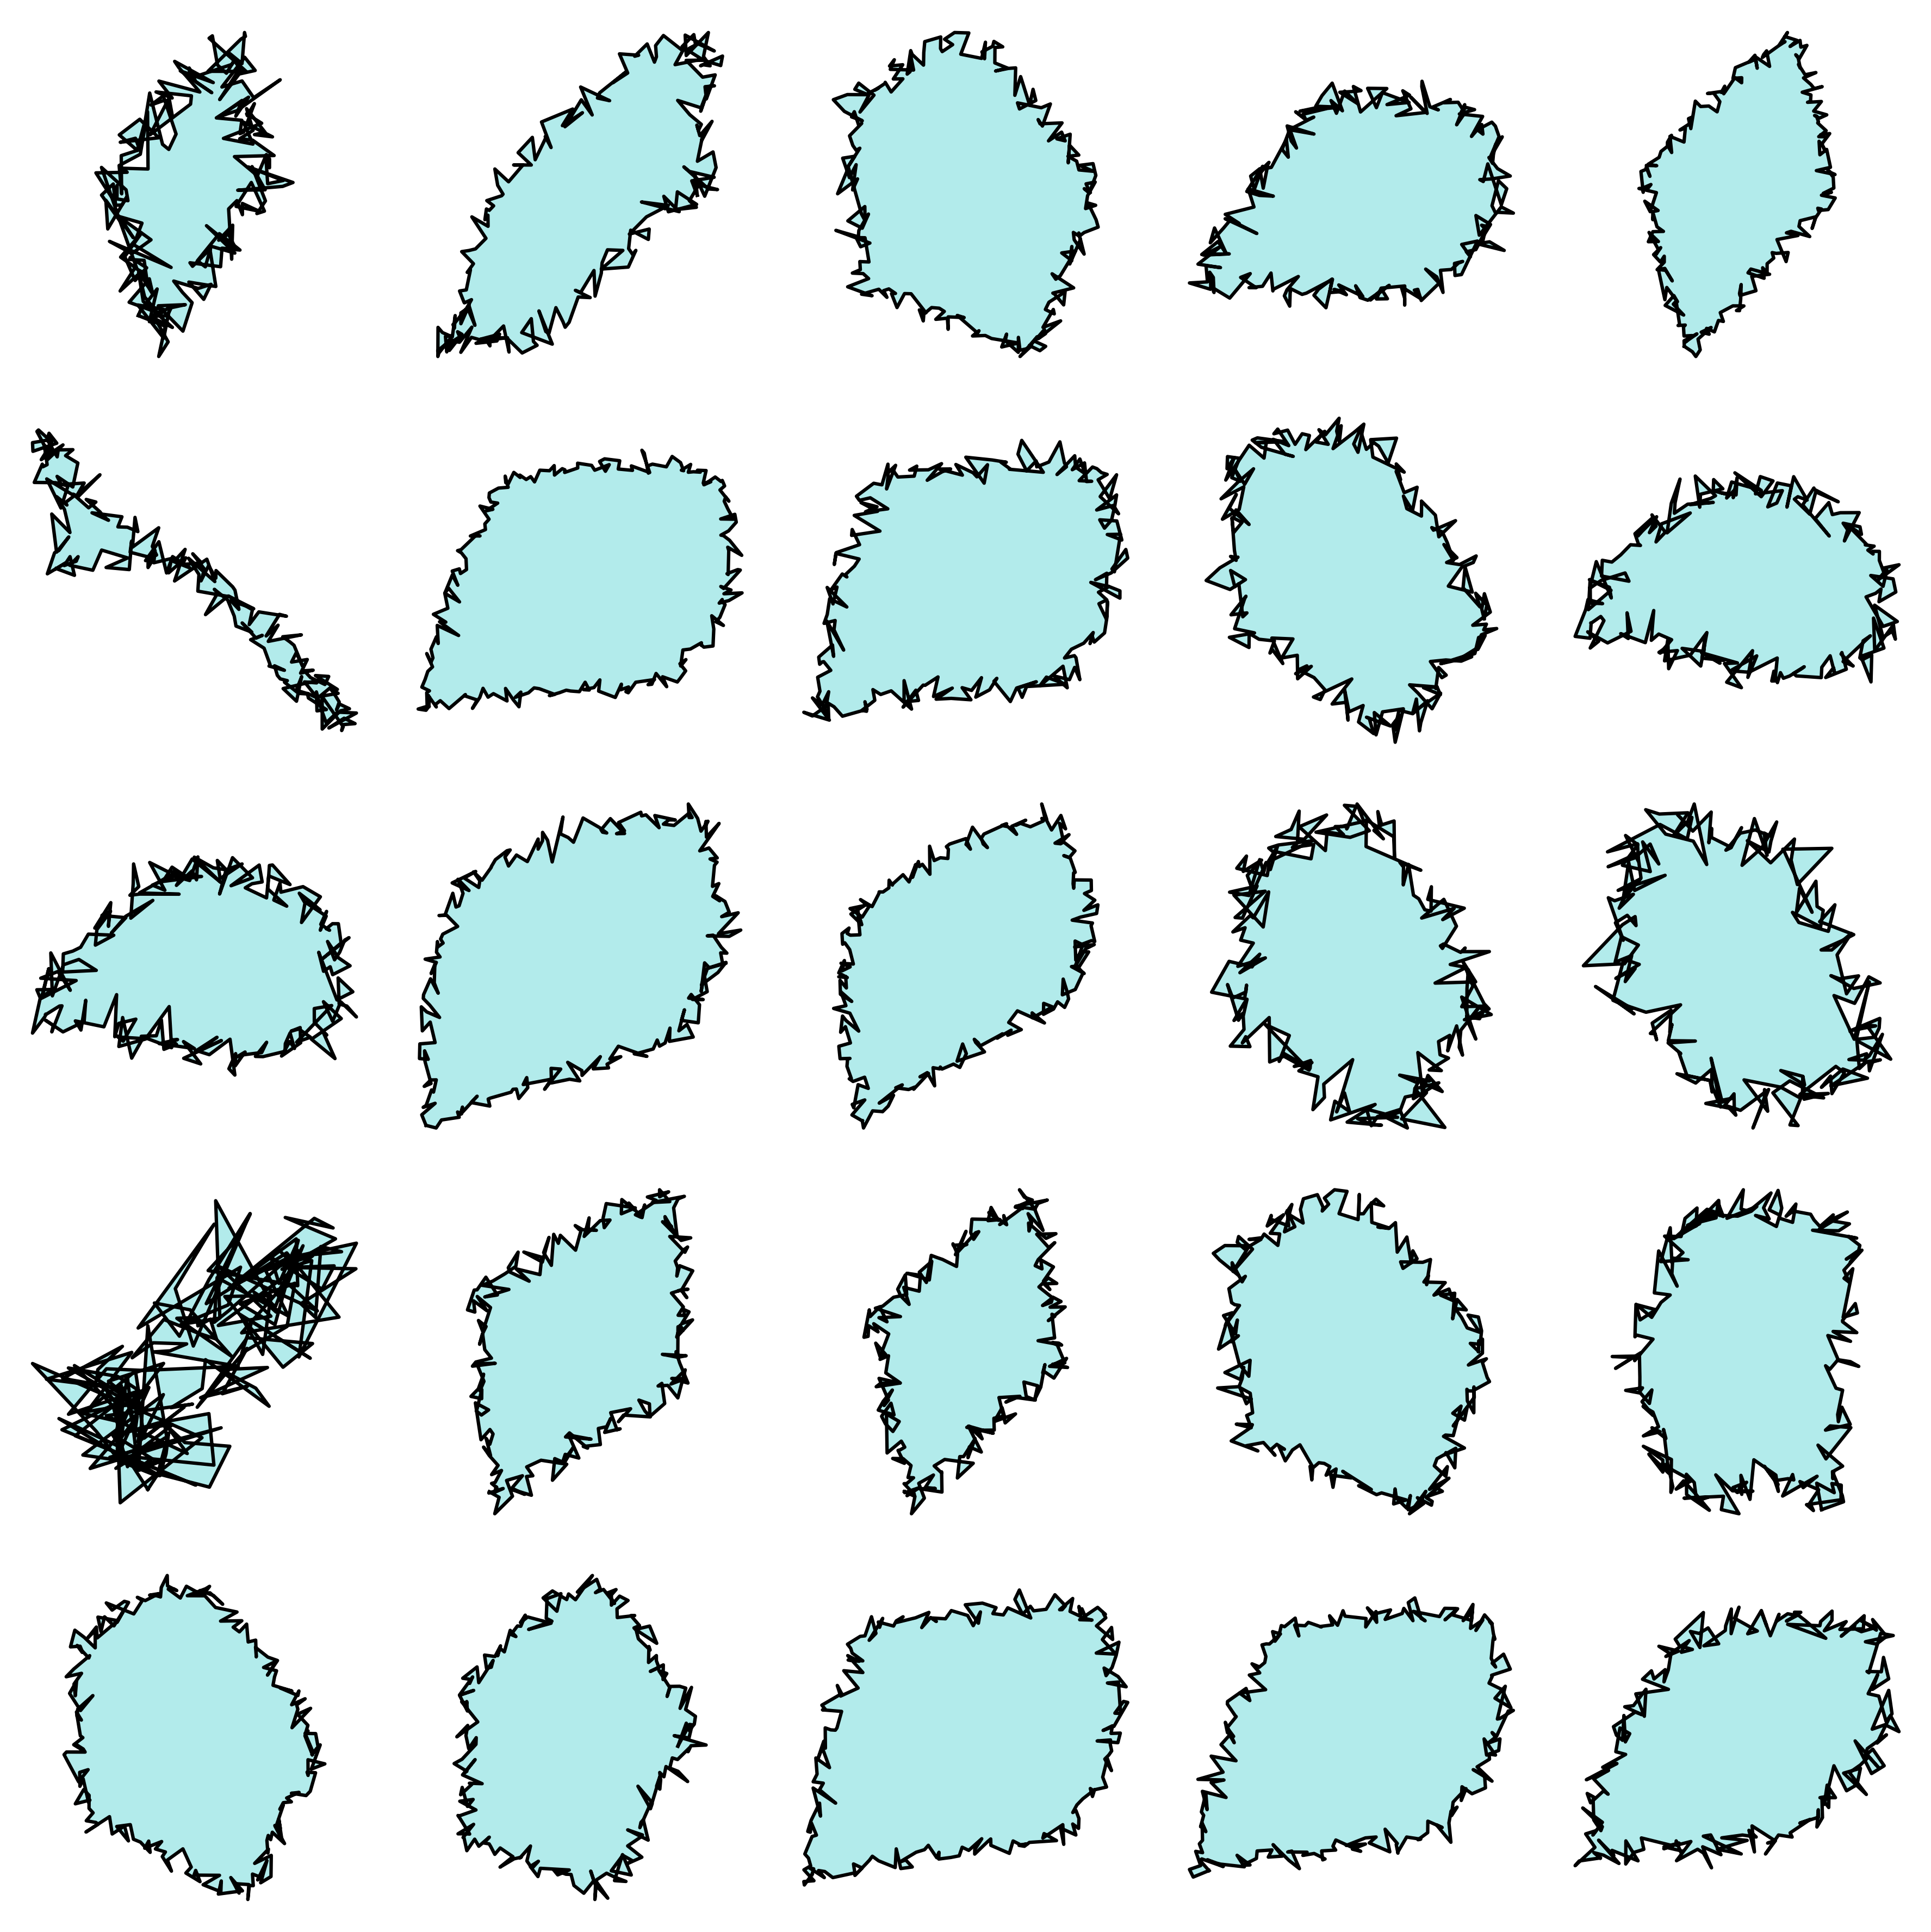

In [82]:
population.plot() # View samples of initial population

### Genetic Algorithm Settings:
* ```num_generations``` - Specifies how many evolutions of the GA to run.
* ```num_parents``` - At each evolution, how many individuals to consider for crossover & mutation.
* ```mutation_probability``` - The chance of genes inside the individuals to be mutated.

In [ ]:
ga = pyga.GeneticAlgorithm(population, 
                           num_generations=100, 
                           num_parents=4, 
                           mutation_probability=0.5, 
                           animate=False)

In [84]:
ga.evolve()

Evolution: 100%|██████████| 100/100 [00:08<00:00, 12.08it/s]


### Fitness Score Tracking
* The maximum fitness value of all sampled in the population is plotted for each generation.

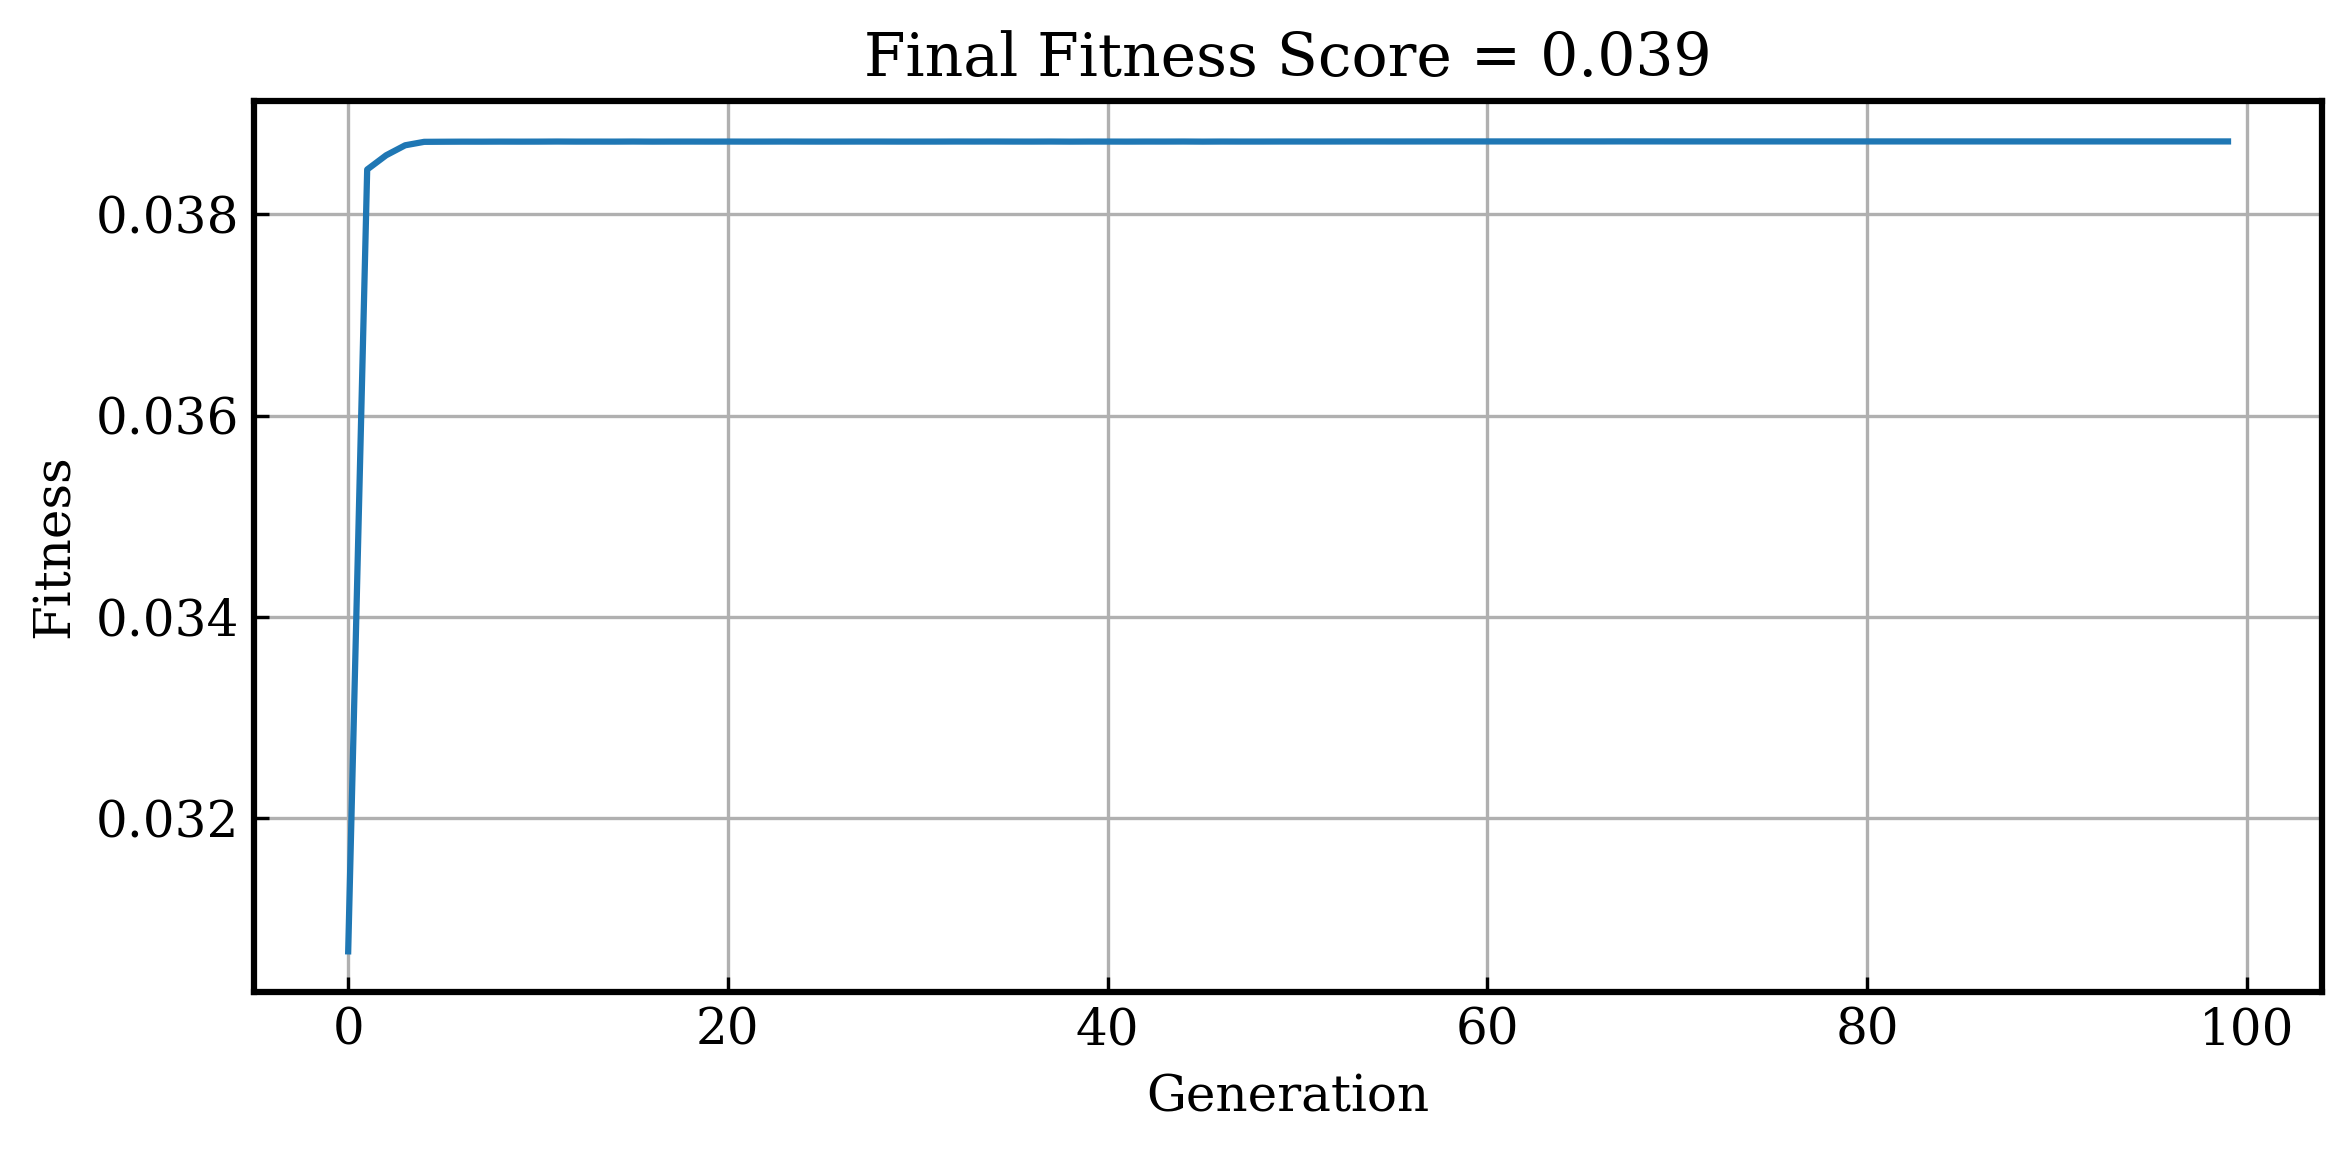

In [87]:
ga.plot_fitness()
plt.title(f'Final Fitness Score = {ga.fitness[-1]:.3f}')
plt.tight_layout()

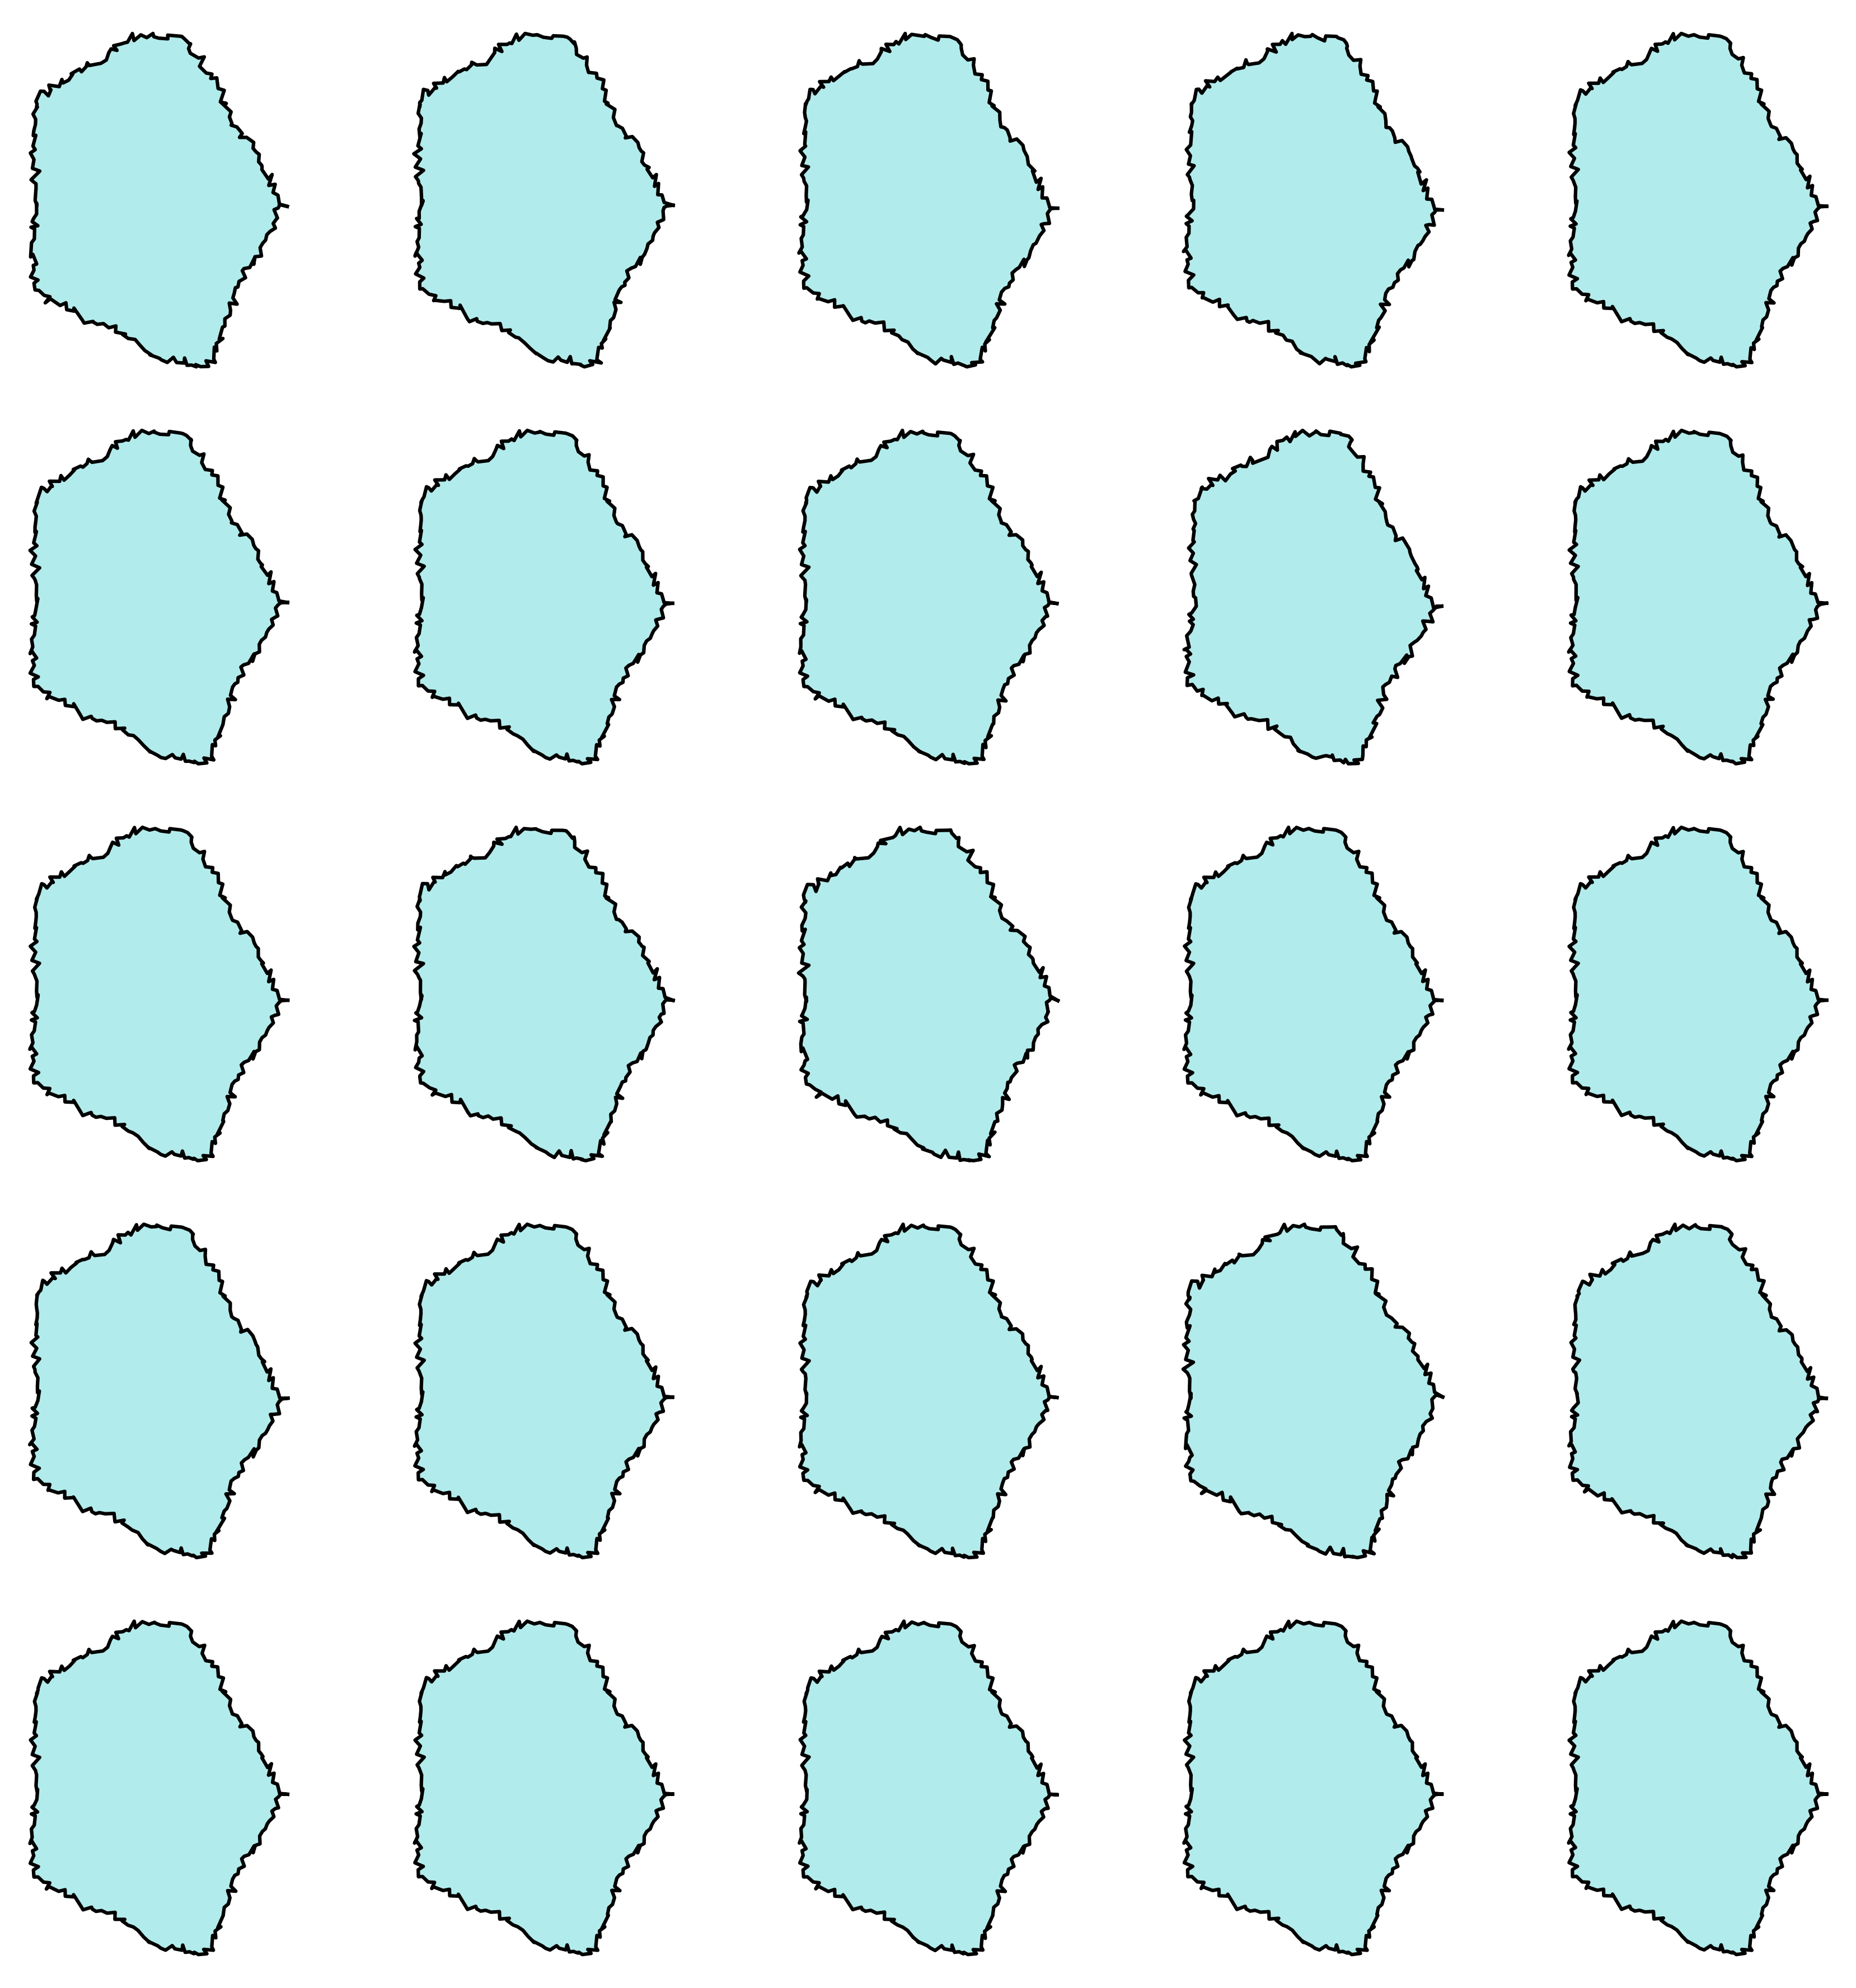

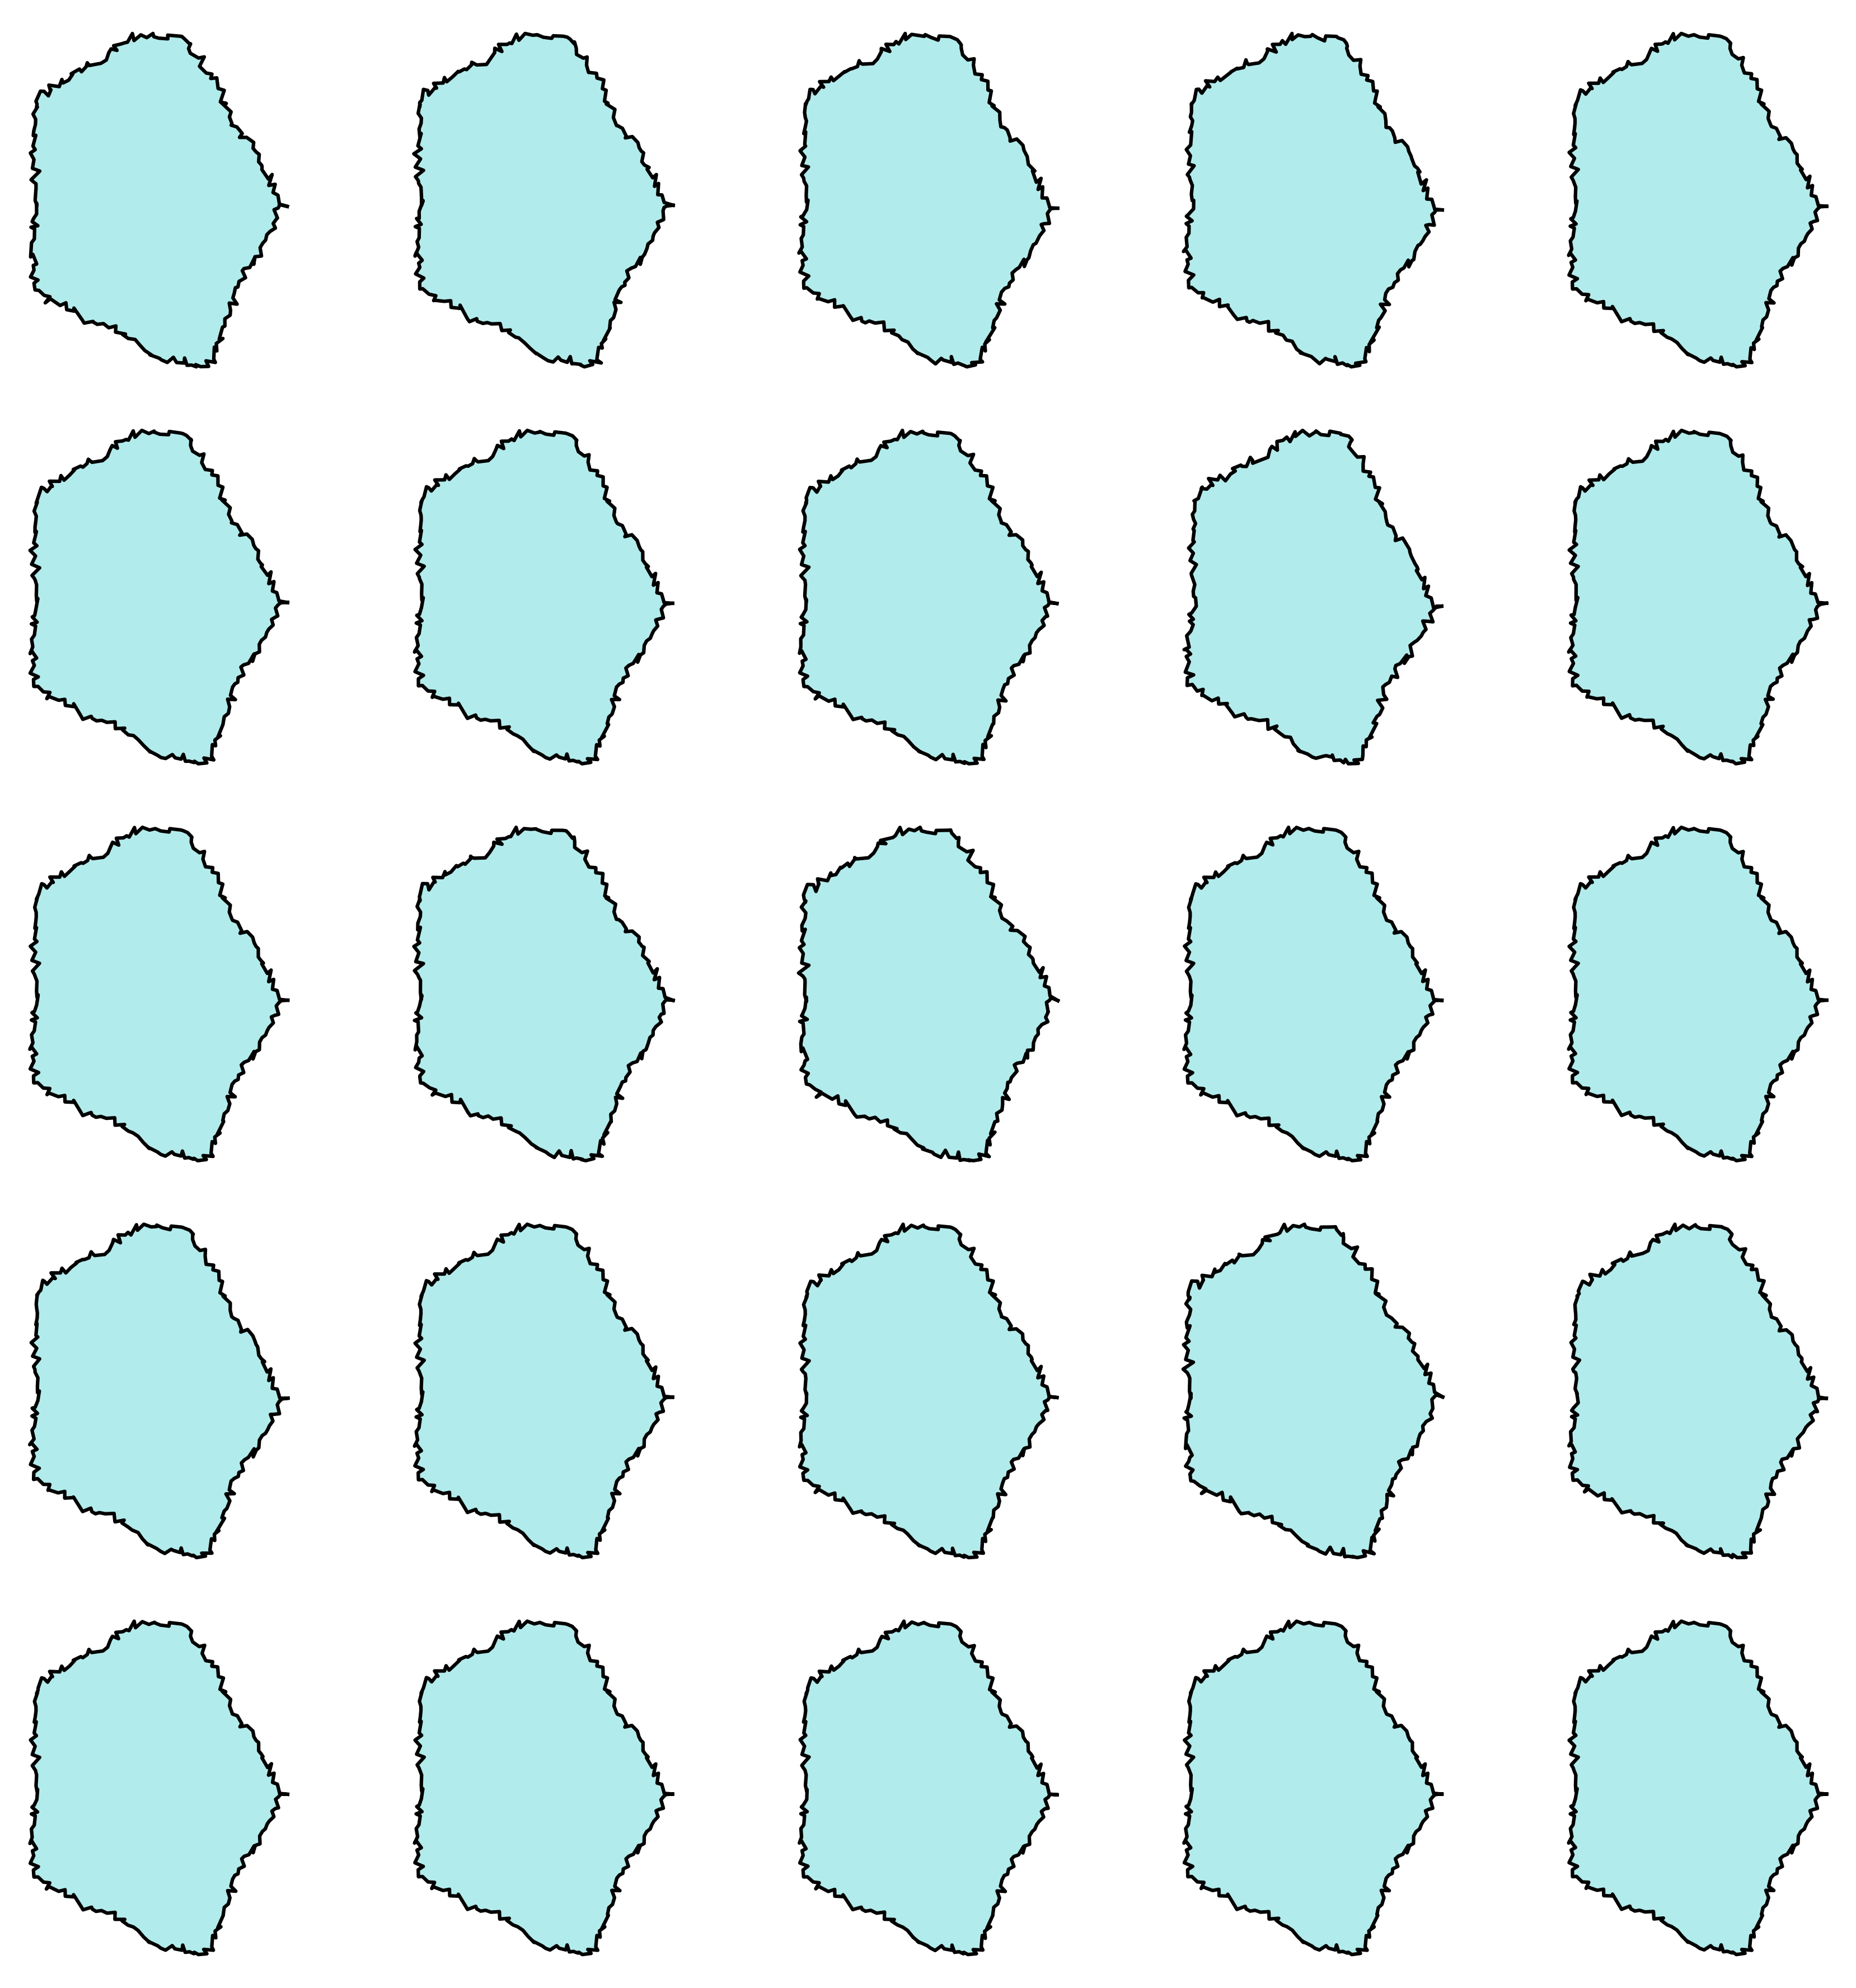

In [88]:
population.plot()